<a href="https://colab.research.google.com/github/gaurav0720/ML_Project_on_EDA_for_cars/blob/master/EDA_for_cars_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project on EDA using Python

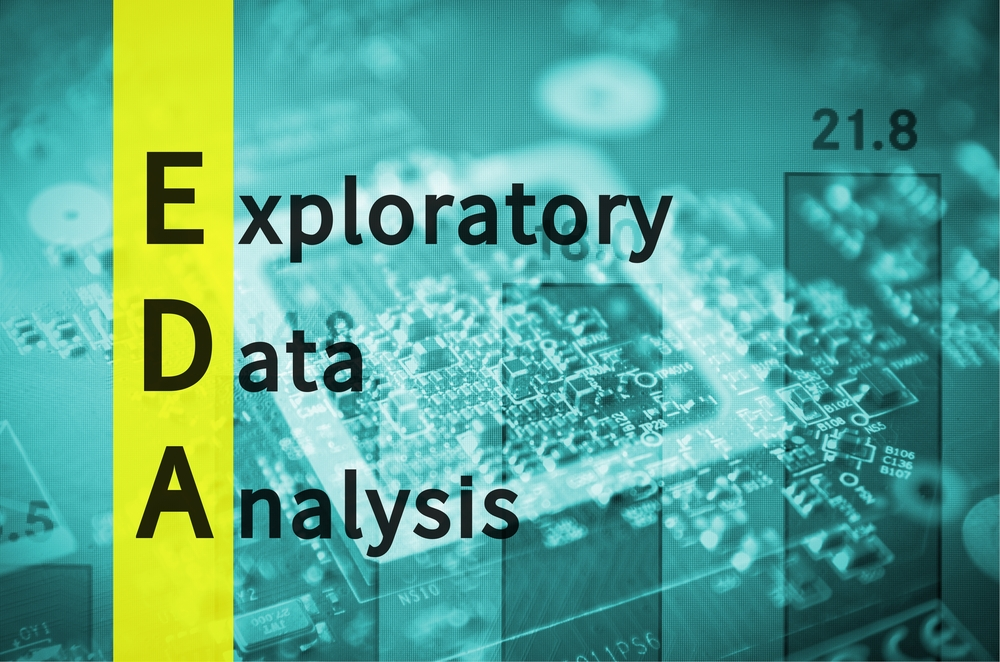

# **INTRODUCTION TO EDA**

## **What is meant by Exploratory Data Analysis(EDA)?**

EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:
1. main features of data
2. variables and relationships that hold between them
3. identifying which variables are important for our problem

Plotting in EDA consists of Histograms, Box Plot, Scatter Plot and many more. It often takes much time to explore the data.









## **How to perform EDA using Python (General Steps)**

1. Importing the dataset
2. Identifying the number of features or columns
3. Identifying the features or columns
4. Identifying the data types of features
5. Identifying the number of observations
6. Checking if the dataset has empty cells or samples
7. Identifying the number of empty cells by features or columns
8. Exploring Categorical features
9. Data Cleaning
10. Reordering The Dataset
11. Data Recordings and Modelling Part

#**1) Importing Required Libraries for EDA**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt          
%matplotlib inline   
plt.rcParams["figure.figsize"] = (10,6)   

## **1.1) Loading Data into DataFrame**

In [4]:
car_dataset = pd.read_csv('data.csv')
car_dataset.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


To load data into dataframe or colab can be carried into more two ways:

1. From Local Drive:  [click here](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2(%20From%20a%20local%20drive&text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file) to see how
2. From Google Drive via PyDrive: [click here](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2(%20From%20a%20local%20drive&text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file) to see how



In [5]:
#To display bottom 5 rows of dataset
car_dataset.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## **1.2) Checking the types of data and Basic summary statistics**

In these step we check the datatypes of the different columns because the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string into the integer data only then we can plot the data via graph.

Let's check for the datatypes:



In [6]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

As here, the data is already in integer format so there is no need to worry for a conversions.

In [7]:
car_dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#**2) Dropping Irrelevant Columns**

In these step, we need to remove the irrelevent columns from the dataframe as these columns makes no sense in our dataframe and are of no need. This step is certainly needed in EDA because sometimes there would be columns that we never use and in that case, dropping them is more useful.

So, in our dataset the column **Market Category** need to be removed first as it contains lot of null values. And columns **Engine Fuel Type** and **Number of Doors** maynot be that relevant therefore they too are removed.# New Section

In [10]:
car_dataset = car_dataset.drop(['Market Category','Engine Fuel Type','Number of Doors'], axis=1)
car_dataset.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **3) Renaming the columns**

These step is required for the purpose that the names used for the columns in the dataset can be confusing or not readable, so they need to be renamed that one can read datasets easily and without any confusions.

In [12]:
car_dataset = car_dataset.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
car_dataset.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# **4) Dropping the Duplicate Rows**

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data, so here we remove all the duplicate value from the data-set.

In [14]:
car_dataset.shape

(11914, 13)

In [16]:
duplicate_rows_car_dataset = car_dataset[car_dataset.duplicated()]
print("Number of Duplicate Rows in these dataset are: ", duplicate_rows_car_dataset.shape)

Number of Duplicate Rows in these dataset are:  (792, 13)


In [17]:
car_dataset = car_dataset.drop_duplicates()
car_dataset.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [18]:
car_dataset.shape

(11122, 13)

## **4.1) Dropping the Missing or Null Values**

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not the best approach and generally people just replace the missing values with the mean or the average of that column. This helps in fine tuning the model performance as more the data, a model has the better it performs. But the objective of this project is to do EDA and its fine to drop missing values and also the number of missing values is small compared to the entire dataset.

In [19]:
print(car_dataset.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


*Dropping Missing Values*

In [20]:
car_dataset = car_dataset.dropna()
car_dataset.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [21]:
print(car_dataset.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# **5) Detecting Outliers**

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. To know more about handling outliers, here is a resource[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

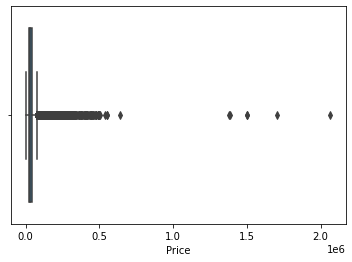

In [22]:
sns.boxplot(x=car_dataset['Price'])

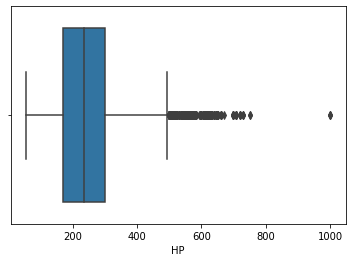

In [23]:
sns.boxplot(x=car_dataset['HP'])

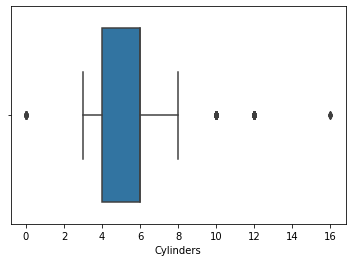

In [25]:
sns.boxplot(x=car_dataset['Cylinders'])

In [26]:
Q1 = car_dataset.quantile(0.25)
Q3 = car_dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [61]:
car_dataset = car_dataset[~((car_dataset < (Q1 - 1.5 * IQR)) |(car_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
car_dataset.shape

(8546, 14)

# **6) What car brands are the most represented in the dataset and finding the average price among the top car brands**

## ***6.1) Finding most represented car brands (top brands)***

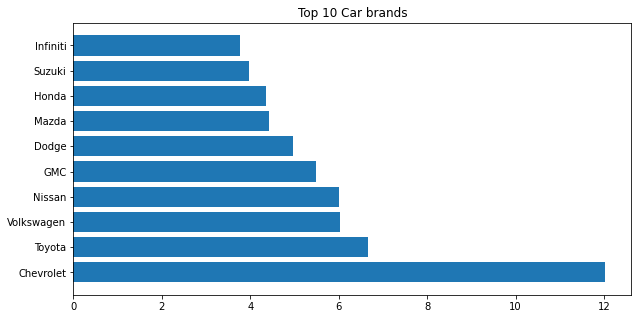

In [28]:
# Percentage of car per brand
counts = car_dataset['Make'].value_counts()*100/sum(car_dataset['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

## ***6.2) Finding the average price among top car brands***

In [30]:
prices = car_dataset[['Make','Price']].loc[(car_dataset['Make'] == 'Chevrolet')|
               (car_dataset['Make'] == 'Ford')|
               (car_dataset['Make'] == 'Volkswagen')|
               (car_dataset['Make'] == 'Toyota')|
               (car_dataset['Make'] == 'Dodge')|
               (car_dataset['Make'] == 'Nissan')|
               (car_dataset['Make'] == 'GMC')|
               (car_dataset['Make'] == 'Honda')|
               (car_dataset['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# **7) Correlation Matrix**

In [31]:
car_dataset.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


## ***High Correlation and High Anticorrelation***

**High Correlation is between** 
1. Cylinders and HP
2. Highway MPG and City MPG

*The more there will be cylinders, there will be more Horse Power(HP)*

**High Anticorrelation is between**
1. Cylinders and Highway MPG

*Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.*


# **8) Exploratory Data Analysis**

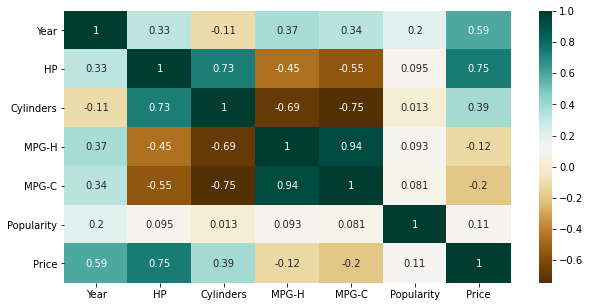

In [32]:
plt.figure(figsize=(10,5))
c = car_dataset.corr()
sns.heatmap(c, cmap="BrBG", annot = True)

## **Scatterplot**

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line.

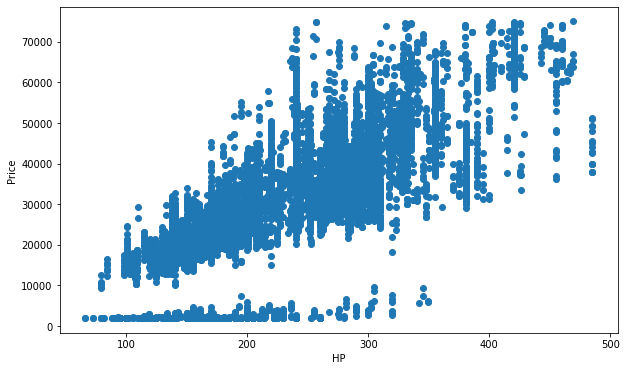

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(car_dataset['HP'], car_dataset['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## **Which Vehicle Style segment of cars sold the most ?**

### ***Bar chart for car body variable***

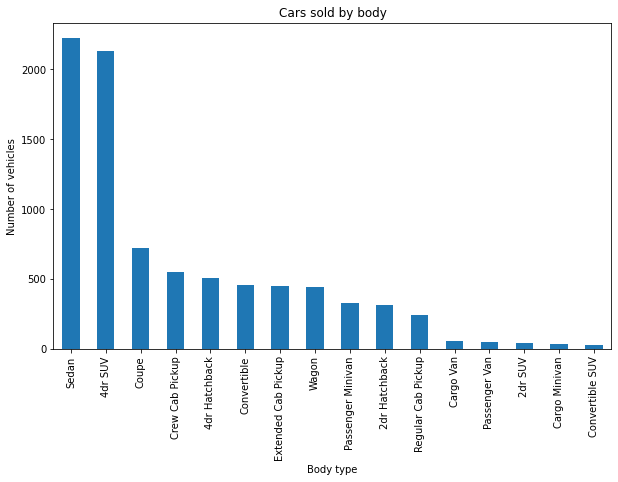

In [60]:
car_dataset['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))                     
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type');

Conclusion from the chart says that Sedan Body Type Cars were the most sold cars followed by 4dr SUV Body Type Cars.

### ***Vehicle Style type and Drive type analysis***

Text(0.5, 0, 'Count of vehicles')

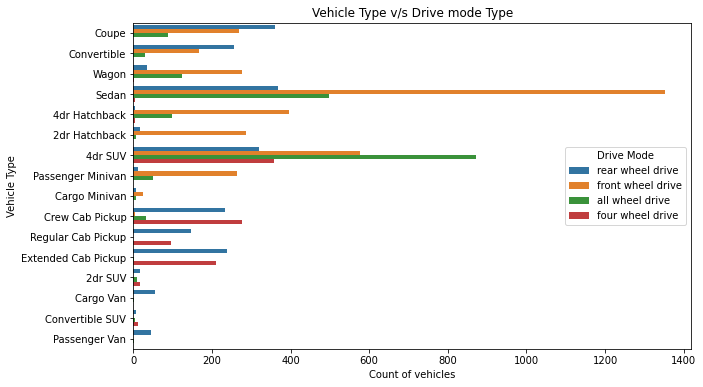

In [38]:
sns.countplot(y='Vehicle Style',data=car_dataset, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')

## **Making a New group "Price_group"**

### ***Create a new column 'Price_group' and assign the value based on car price***

In [39]:
car_dataset['price_group'] = pd.cut(car_dataset['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
car_dataset['price_group'] = car_dataset['price_group'].astype(object)

### ***Using new column to plot the next diagram***

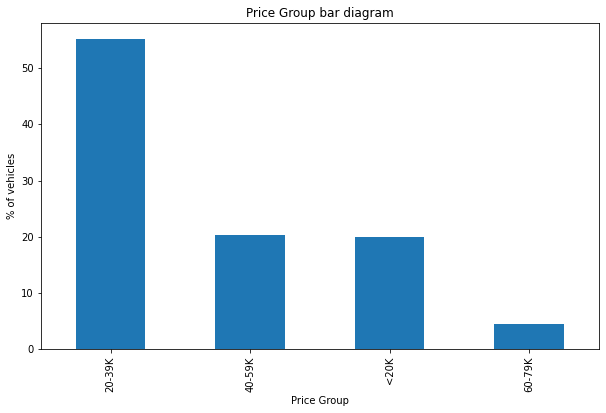

In [40]:
(car_dataset['price_group'].value_counts() / len(car_dataset) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

In [41]:
X = car_dataset[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = car_dataset['Price'].values

# **9) Base ML Model**

## ***Feature Scaling***

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

## ***Splitting the dataset into the Training set and Test set***

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## ***Fitting Multiple Linear Regression to the Training set***

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## ***Predicting the Test set results***

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

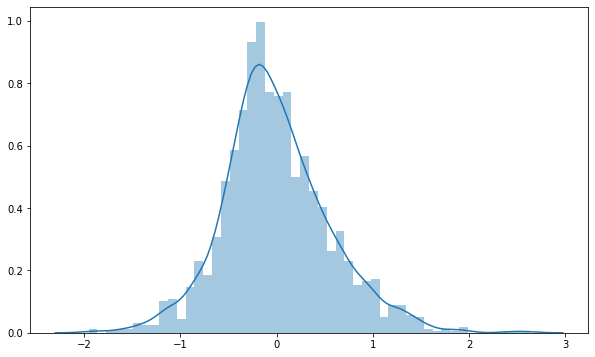

In [46]:
sns.distplot((y_test-y_pred),bins=50)

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4256788993790108
Root Mean Squared Error: 0.5578433473146853
R2 Score: 0.6800475541161142


# **10) Spot Checking Algorithms**

## ***Fitting Polynomial Regression to the dataset***

In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## ***Predicting a new result with Polynomial Regression***

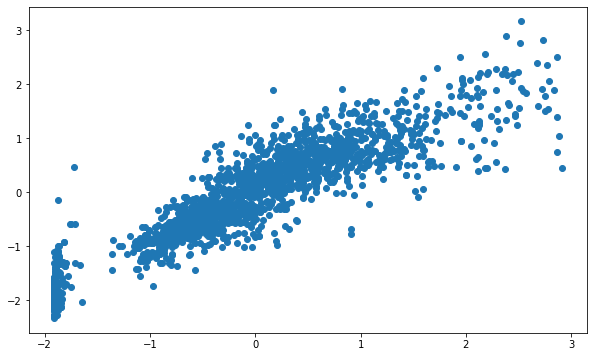

In [49]:
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

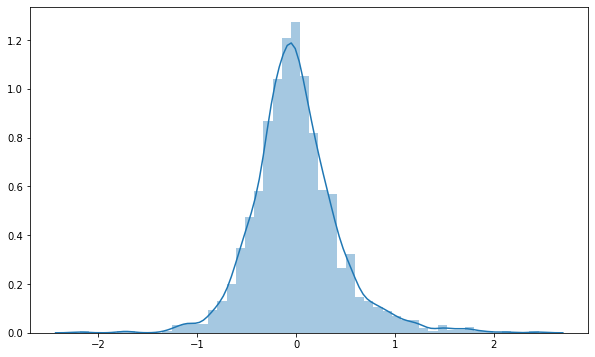

In [50]:
sns.distplot((y_test-y_pred),bins=50)

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.31573061752350967
Root Mean Squared Error: 0.4351456478672659
R2 Score: 0.8053160242314694


## ***Fitting SVR to the dataset***

In [52]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## ***Predicting a new result***

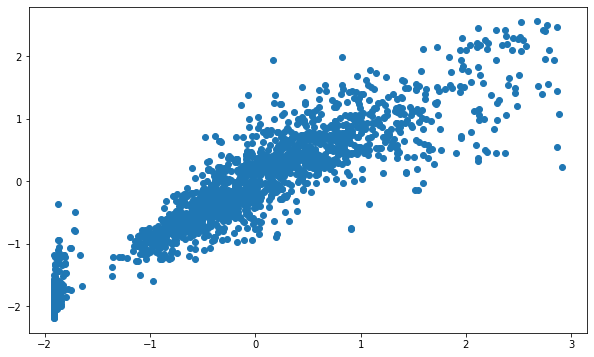

In [53]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

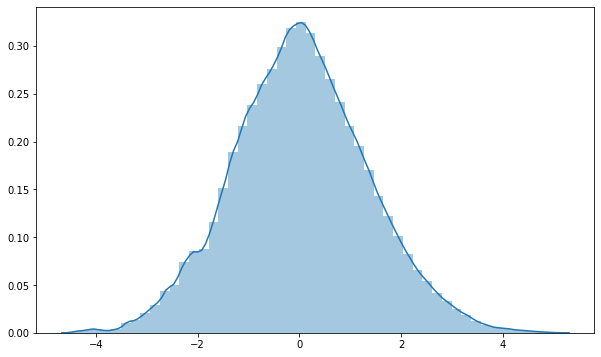

In [54]:
sns.distplot((y_test-y_pred),bins=50)

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.29633619416546725
Root Mean Squared Error: 0.42527355451237575
R2 Score: 0.814049362176249


## ***Fitting Random Forest Regression to the dataset***

In [56]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

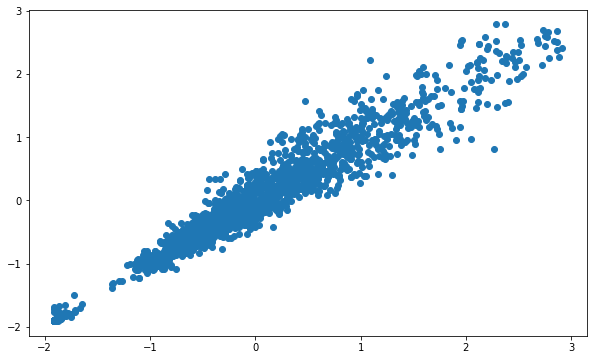

In [57]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

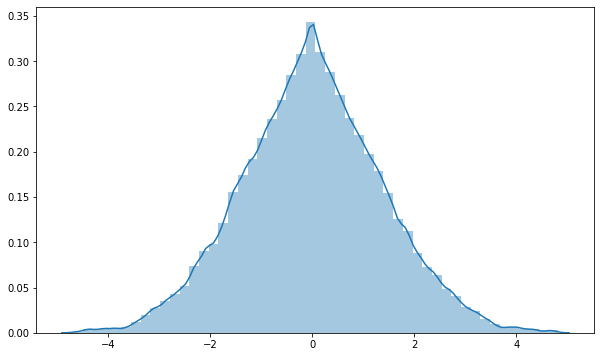

In [58]:
sns.distplot((y_test-y_pred),bins=50)

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17769704010247667
Root Mean Squared Error: 0.24743996001244517
R2 Score: 0.9370492959370332
